In [20]:
import os
import glob 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [21]:
ivp_files = glob.glob("raw_timing_IvPSim_*ms.csv")
kvs_files = glob.glob("raw_timing_KVS_*_*ms.csv")
all_files = ivp_files + kvs_files

In [22]:
records = []
for fn in all_files:
    name = fn.split("/")[-1].replace(".csv","")
    parts = name.split("_")
    kind   = parts[2]              
    period = int(parts[-1].replace("ms",""))
    df     = pd.read_csv(fn)
    records.append({
        "kind":   kind,
        "period": period,
        "BCET":   df["ms"].min(),
        "ACET":   df["ms"].mean(),
        "WCET":   df["ms"].max(),
    })

lat_df = pd.DataFrame(records)
lat_df

,kind,period,BCET,ACET,WCET
0,IvPSim,100,9,10.813250,12
1,IvPSim,10,10,11.601900,13
2,IvPSim,200,9,11.322500,12
3,IvPSim,20,10,11.747600,14
4,IvPSim,30,10,11.993176,14
5,IvPSim,400,10,11.302000,12
6,IvPSim,40,10,11.240400,12
7,IvPSim,50,10,11.088250,12
8,IvPSim,800,10,12.264000,13
9,KVS,100,3,3.256333,4


In [23]:
lat_df = lat_df.rename(columns={"period_ms": "period"})

summary = (
    lat_df
    .groupby(["kind", "period"], as_index=False)
    .agg(
        BCET = ("BCET", "min"),
        ACET = ("ACET", "mean"),
        WCET = ("WCET", "max")
    )
)
lat_df

,kind,period,BCET,ACET,WCET
0,IvPSim,100,9,10.813250,12
1,IvPSim,10,10,11.601900,13
2,IvPSim,200,9,11.322500,12
3,IvPSim,20,10,11.747600,14
4,IvPSim,30,10,11.993176,14
5,IvPSim,400,10,11.302000,12
6,IvPSim,40,10,11.240400,12
7,IvPSim,50,10,11.088250,12
8,IvPSim,800,10,12.264000,13
9,KVS,100,3,3.256333,4


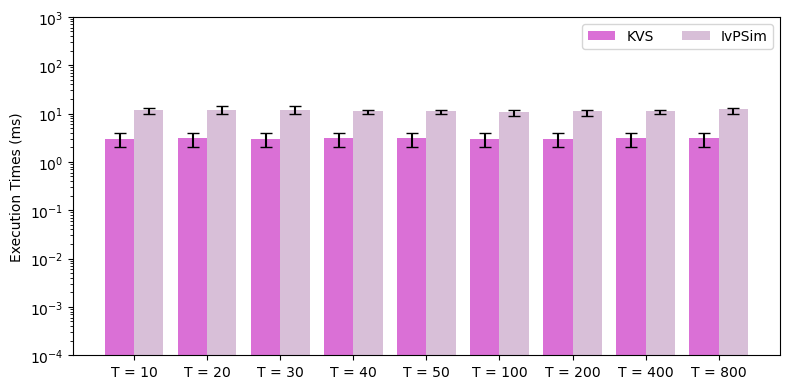

In [24]:
periods = sorted(summary["period"].unique())
kinds   = ["KVS","IvPSim"]
x       = np.arange(len(periods))
colors = {
    "KVS":    "orchid",
    "IvPSim": "thistle"
}
width   = 0.4

fig, ax = plt.subplots(figsize=(8,4))

for i, kind in enumerate(kinds):
    sub = (
        summary[summary["kind"]==kind]
        .set_index("period")
        .reindex(periods)
    )
    y        = sub["ACET"]
    err_low  = y - sub["BCET"]
    err_high = sub["WCET"] - y

    ax.bar(
        x + (i-0.5)*width,
        y,
        width,
        label=kind,
        yerr=[err_low, err_high],
        capsize=4,
        color=colors[kind] 
    )

ax.set_xticks(x)
ax.set_xticklabels([f"T = {p}" for p in periods])
ax.set_ylabel("Execution Times (ms)")
ax.set_yscale("log")
ax.set_ylim(1e-4, 1e3)
ax.legend(ncol=2)
plt.tight_layout()
plt.savefig("et.pdf")
plt.show()

In [25]:
sr_records = []
for fn in kvs_files:
    base   = fn.split("/")[-1].replace(".csv","")
    parts  = base.split("_")
    period = int(parts[-1].rstrip("ms"))
    df = pd.read_csv(fn)
    read_pct  = df["successful_reads"].max()  / df["total_reads"].max()  * 100
    write_pct = df["successful_writes"].max() / df["total_writes"].max() * 100
    sr_records.append({
        "period":  period,
        "Read %":  read_pct,
        "Write %": write_pct
    })
tmp = pd.DataFrame(sr_records)
sr_df = (tmp.groupby("period", as_index=True)[["Read %","Write %"]]
            .mean()
            .sort_index())
sr_df

,Read %,Write %
period,,
10,100.0,100.0
20,100.0,100.0
30,100.0,100.0
40,100.0,100.0
50,100.0,100.0
100,100.0,100.0
200,100.0,100.0
400,100.0,100.0
800,100.0,100.0


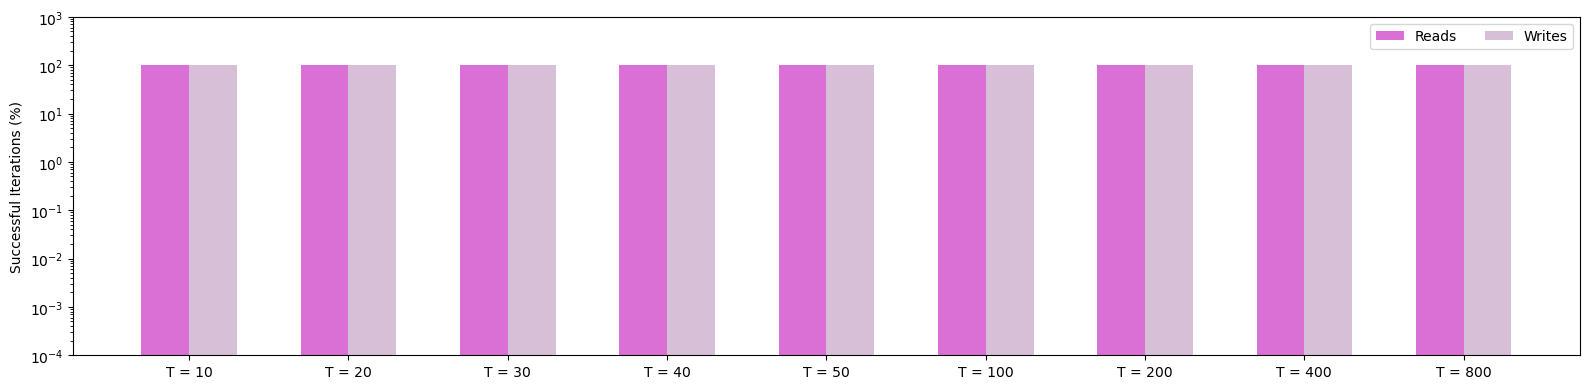

In [26]:
periods = sr_df.index.values
x       = np.arange(len(periods))
width   = 0.3

fig, ax = plt.subplots(figsize=(16,4))
ax.bar(x - width/2, sr_df["Read %"],  width, label="Reads", color="orchid")
ax.bar(x + width/2, sr_df["Write %"], width, label="Writes", color="thistle")

ax.set_xticks(x)
ax.set_xticklabels([f"T = {p}" for p in periods])
ax.set_ylabel("Successful Iterations (%)")
ax.set_yscale("log")
ax.set_ylim(1e-4, 1e3)
ax.legend(ncol=2)

plt.tight_layout()
plt.savefig("si.pdf")
plt.show()

In [32]:
lag_records = []
for fn in ivp_files:
    name = fn.split("/")[-1].replace(".csv","")
    parts = name.split("_")
    kind   = parts[2]              
    period = int(parts[-1].replace("ms",""))
    df     = pd.read_csv(fn)
    lag_records.append({
        "kind":   kind,
        "period": period,
        "BCL":    df["lag_ms"].min(),
        "ACL":    df["lag_ms"].mean(),
        "WCL":    df["lag_ms"].max(),
    })

lag_df = pd.DataFrame(lag_records)
lag_df

,kind,period,BCL,ACL,WCL
0,IvPSim,100,10,10.914500,12
1,IvPSim,10,10,49166.227650,97922
2,IvPSim,200,10,11.396500,12
3,IvPSim,20,11,24.802100,101
4,IvPSim,30,10,12.081584,14
5,IvPSim,400,10,11.376000,12
6,IvPSim,40,10,11.313900,12
7,IvPSim,50,10,11.138500,12
8,IvPSim,800,11,12.356000,13


In [35]:
lag_summary = (
    lag_df
    .groupby(["kind", "period"], as_index=False)
    .agg(BCL=("BCL","min"),
         ACL=("ACL","mean"),
         WCL=("WCL","max"))
)

lag_summary

,kind,period,BCL,ACL,WCL
0,IvPSim,10,10,49166.227650,97922
1,IvPSim,20,11,24.802100,101
2,IvPSim,30,10,12.081584,14
3,IvPSim,40,10,11.313900,12
4,IvPSim,50,10,11.138500,12
5,IvPSim,100,10,10.914500,12
6,IvPSim,200,10,11.396500,12
7,IvPSim,400,10,11.376000,12
8,IvPSim,800,11,12.356000,13


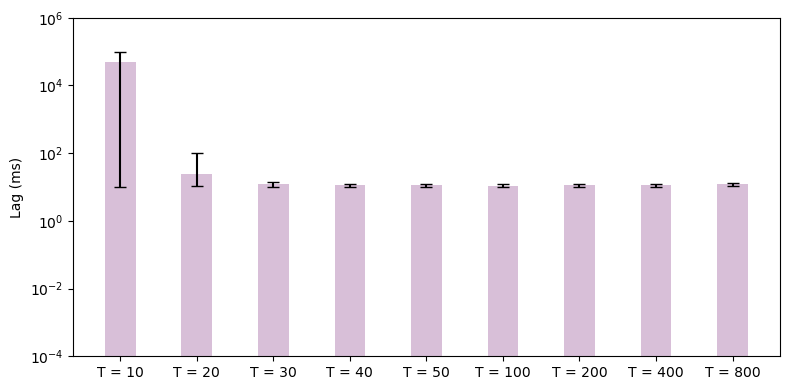

In [43]:
periods = sorted(lag_summary["period"].unique())
kinds   = ["IvPSim"]
x       = np.arange(len(periods))
colors = {
    # "KVS":    "orchid",
    "IvPSim": "thistle"
}
width   = 0.4

fig, ax = plt.subplots(figsize=(8,4))

for i, kind in enumerate(kinds):
    sub = (
        lag_summary[lag_summary["kind"]==kind]
        .set_index("period")
        .reindex(periods)
    )
    y        = sub["ACL"]
    err_low  = y - sub["BCL"]
    err_high = sub["WCL"] - y

    ax.bar(
        x,
        y,
        width,
        label=kind,
        yerr=[err_low, err_high],
        capsize=4,
        color=colors[kind] 
    )

ax.set_xticks(x)
ax.set_xticklabels([f"T = {p}" for p in periods])
ax.set_ylabel("Lag (ms)")
ax.set_yscale("log")
ax.set_ylim(1e-4, 1e6)
plt.tight_layout()
plt.savefig("lag.pdf")
plt.show()

In [45]:
df10 = pd.read_csv("raw_timing_IvPSim_10ms.csv")
df20 = pd.read_csv("raw_timing_IvPSim_20ms.csv")

In [54]:
def generate_custom_time(df, step_size):
    t_s = []
    current_t = 0.0
    for i in range(len(df)):
        t_s.append(current_t)
        if i % 4 == 0 and i != 0:
            current_t += step_size
    return t_s

df10["t_s"] = generate_custom_time(df10, 0.01)
df20["t_s"] = generate_custom_time(df20, 0.02)

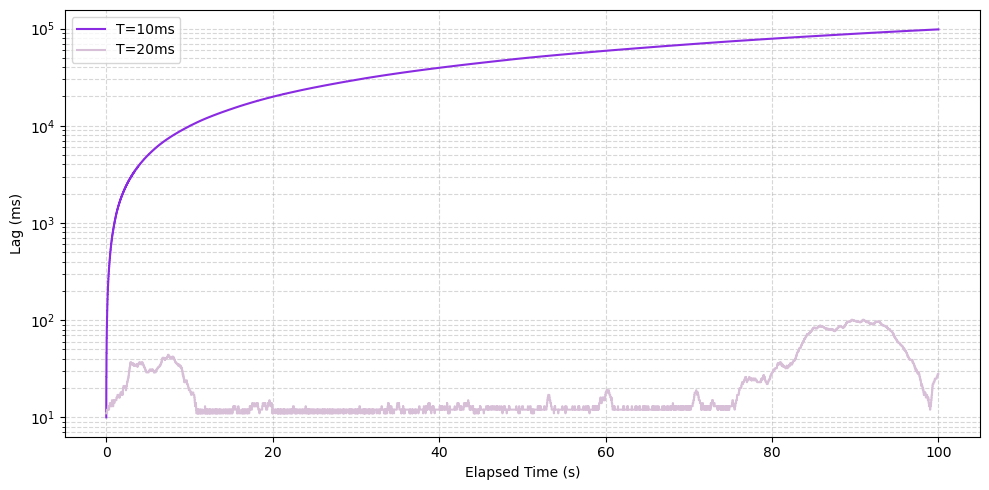

In [56]:
plt.figure(figsize=(10, 5))
plt.plot(df10["t_s"], df10["lag_ms"], label="T=10ms", color="blueviolet")
plt.plot(df20["t_s"], df20["lag_ms"], label="T=20ms", color="thistle")

plt.xlabel("Elapsed Time (s)")
plt.ylabel("Lag (ms)")
plt.yscale("log")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("IvPSim_Lag_T10_vs_T20.png", dpi=300)
plt.show()